# Primeira Parte - Regressão Simples

C:\Users\HUMBERTO\AppData\Local\Temp\ipykernel_17220\1611451219.py:16: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  data = pd.read_csv(url, header=None, delim_whitespace=False, names=column_names)


Primeiras 5 linhas dos dados:
      CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0  0.00632  18.0   2.31     0  0.538  6.575  65.2  4.0900    1  296.0   
1  0.02731   0.0   7.07     0  0.469  6.421  78.9  4.9671    2  242.0   
2  0.02729   0.0   7.07     0  0.469  7.185  61.1  4.9671    2  242.0   
3  0.03237   0.0   2.18     0  0.458  6.998  45.8  6.0622    3  222.0   
4  0.06905   0.0   2.18     0  0.458  7.147  54.2  6.0622    3  222.0   

   PTRATIO       B  LSTAT  MEDV  
0     15.3  396.90   4.98  24.0  
1     17.8  396.90   9.14  21.6  
2     17.8  392.83   4.03  34.7  
3     18.7  394.63   2.94  33.4  
4     18.7  396.90   5.33  36.2  
Descrição da tabela a ser analisada:
              CRIM          ZN       INDUS        CHAS         NOX          RM  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean     3.613524   11.363636   11.136779    0.069170    0.554695    6.284634   
std      8.601545   23.322453    6.860353    0

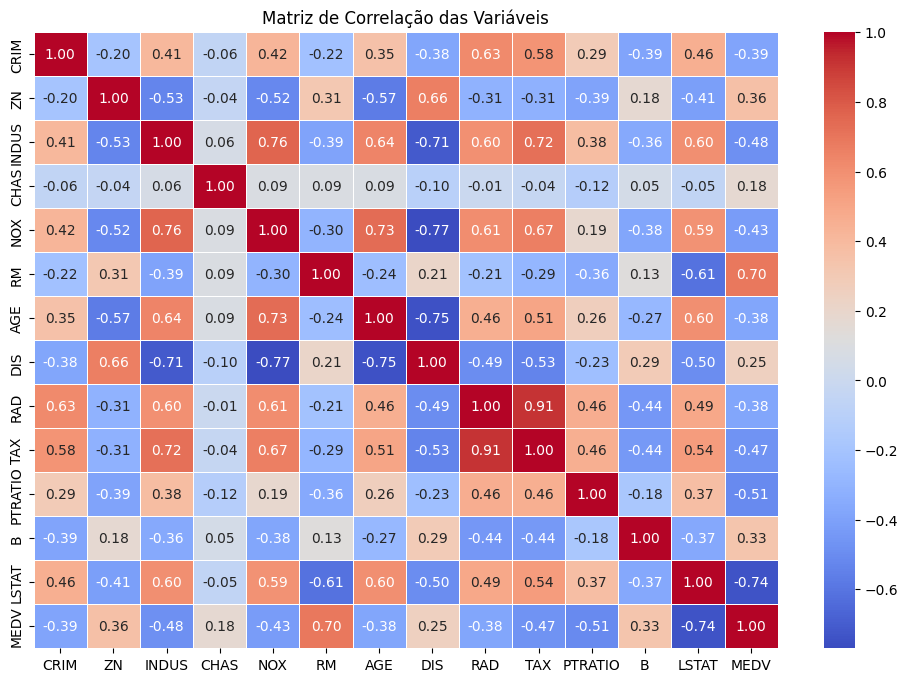

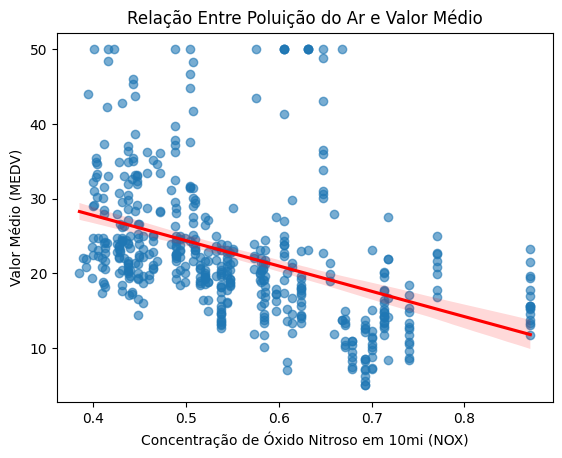

In [44]:
# Importar bibliotecas necessárias
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import matplotlib.pyplot as plt
import seaborn as sns

# Carregar a base de dados
url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/housing.csv"
column_names = ["CRIM", "ZN", "INDUS", "CHAS", "NOX", "RM", "AGE", "DIS", "RAD", "TAX", "PTRATIO", "B", "LSTAT", "MEDV"]
data = pd.read_csv(url, header=None, delim_whitespace=False, names=column_names)

print(f"Primeiras 5 linhas dos dados:\n{data.head()}")

print(f'Descrição da tabela a ser analisada:\n {data.describe()}')

print("Matriz de Correlação:")
correlation_matrix = data.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Matriz de Correlação das Variáveis")
plt.show()

# Etapa 2: Seleção de variável preditora e alvo
X = data[['NOX']].values  # Variável preditora
y = data['MEDV'].values  # Variável alvo


# gráfico de relação entre Poluíção (Concentração de Óxido Nitroso) x Valor Médio
sns.regplot(x=X, y=y, data=data, scatter_kws={'alpha':0.6}, line_kws={'color':'red'})
plt.title('Relação Entre Poluição do Ar e Valor Médio')
plt.xlabel('Concentração de Óxido Nitroso em 10mi (NOX)')
plt.ylabel('Valor Médio (MEDV)')
plt.show()

# Dividir os dados em treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

| Carregando o dataset Boston Housing, que contém informações sobre os imóveis em Boston e variáveis preditoras relevantes.

Nessa primeira etapa eu estou apenas printando as primeiras 5 linhas da tabela para ver como os valores funcionam nela. Além disso, eu utilizo o método describe para mostrar algumas iformações interessantes da tabela, são elas: 
- count: quantidade de valores não nulos
- mean: média dos valores
- std: desvio padrão (quanto os valores dispersão em relação a sua média)
- min: valor mínimo
- max: valor máximo
- 25%, 50% e 75%: percentil de 25%, mediana e percentil 75%

Na matriz de correlação (1): é possível analisar a correlação entre as variáveis utilizadas na apuração desse dataset, isto é, podemos avaliar se uma variável pode estar correlacionada positivamente (ambas crescem/diminuem juntas) ou negativamente (variáveis inversamente proporcionais) com outra. No caso do meu programa, eu estarei utilizando as variáveis NOX e MEDV, que possuem um valor de -0.43 de correlação, indicando ser uma correlação negativa.  

No gráfico de relação entre as variáveis NOX e MEDV (2): é visível que conforme o aumento da concentração de óxido nitroso a tendência é o valor médio diminuir. Na maioria dos casos, uma taxa mais elevada de poluíção pode indicar que o valor médio do imóvel será inferior de áreas com menor poluíção.

# Modelo de Regressão Linear

In [45]:

# Etapa 3: Regressão Linear
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)
y_pred_linear = linear_model.predict(X_test)

# Avaliação da regressão linear
mae_linear = mean_absolute_error(y_test, y_pred_linear)
mse_linear = mean_squared_error(y_test, y_pred_linear)
print("\nRegressão Linear:")
print(f"Mean Absolute Error (MAE): {mae_linear:.2f}")
print(f"Mean Squared Error (MSE): {mse_linear:.2f}")


Regressão Linear:
Mean Absolute Error (MAE): 5.70
Mean Squared Error (MSE): 58.29


# Modelo de Rede Neural

Epoch 1/50


c:\Users\HUMBERTO\Desktop\AI-Activity-2\.venv\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 853us/step - loss: 520.5983 - mae: 21.2277 
Epoch 2/50
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 849us/step - loss: 566.8736 - mae: 22.2519
Epoch 3/50
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 877us/step - loss: 589.4733 - mae: 22.5000
Epoch 4/50
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 855us/step - loss: 561.9789 - mae: 21.7460
Epoch 5/50
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 854us/step - loss: 555.0824 - mae: 21.5792
Epoch 6/50
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 883us/step - loss: 532.7932 - mae: 21.2384
Epoch 7/50
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 896us/step - loss: 538.0870 - mae: 21.1634
Epoch 8/50
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 860us/step - loss: 512.3028 - mae: 20.5111
Epoch 9/50
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 862us/step - loss: 481.9063 - mae: 19.8214
Epoch 10/50
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 893us/step - loss: 480.4938 - mae: 19.7208
Epoch 11/50
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 888us/step - loss: 472.9462 - mae: 19.5112
Epoch 12/50
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 876us/step - loss: 469.5030 - mae: 19.2628

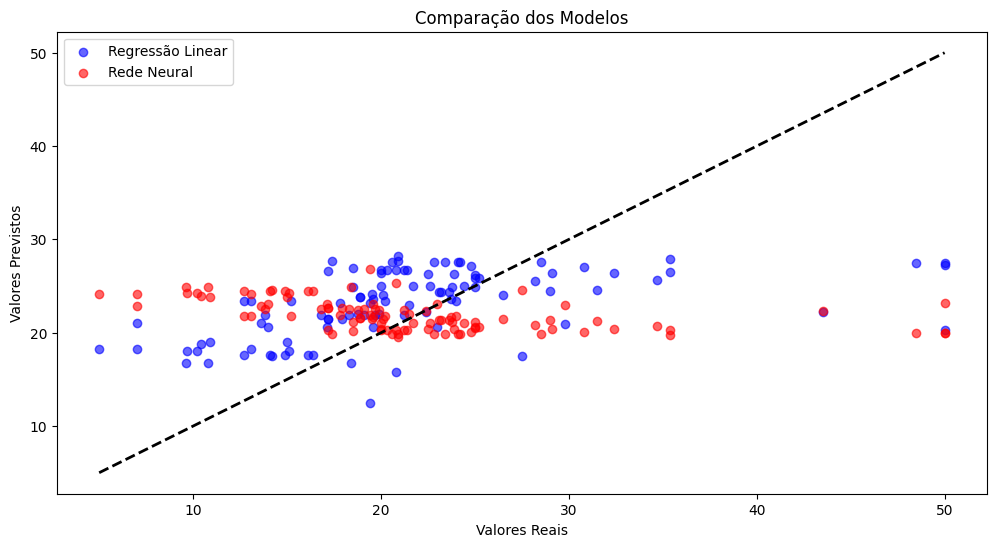

In [46]:
# 2. Modelo de Rede Neural
nn_model = Sequential([
    Dense(10, activation='relu', input_shape=(1,)),
    Dense(1, activation='linear')
])

nn_model.compile(optimizer='adam', loss='mse', metrics=['mae'])

nn_model.fit(X_train, y_train, epochs=50, batch_size=10, verbose=1)

y_pred = nn_model.predict(X_test)
mae_nn = mean_absolute_error(y_test, y_pred)
mse_nn = mean_squared_error(y_test, y_pred)

# Resultados
print("Rede Neural:")
print(f"Mean Absolute Error (MAE): {mae_nn:.2f}")
print(f"Mean Squared Error (MSE): {mse_nn:.2f}")

# Etapa 5: Comparação visual
plt.figure(figsize=(12, 6))
plt.scatter(y_test, y_pred_linear, color='blue', alpha=0.6, label='Regressão Linear')
plt.scatter(y_test, y_pred, color='red', alpha=0.6, label='Rede Neural')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel('Valores Reais')
plt.ylabel('Valores Previstos')
plt.title('Comparação dos Modelos')
plt.legend()
plt.show()

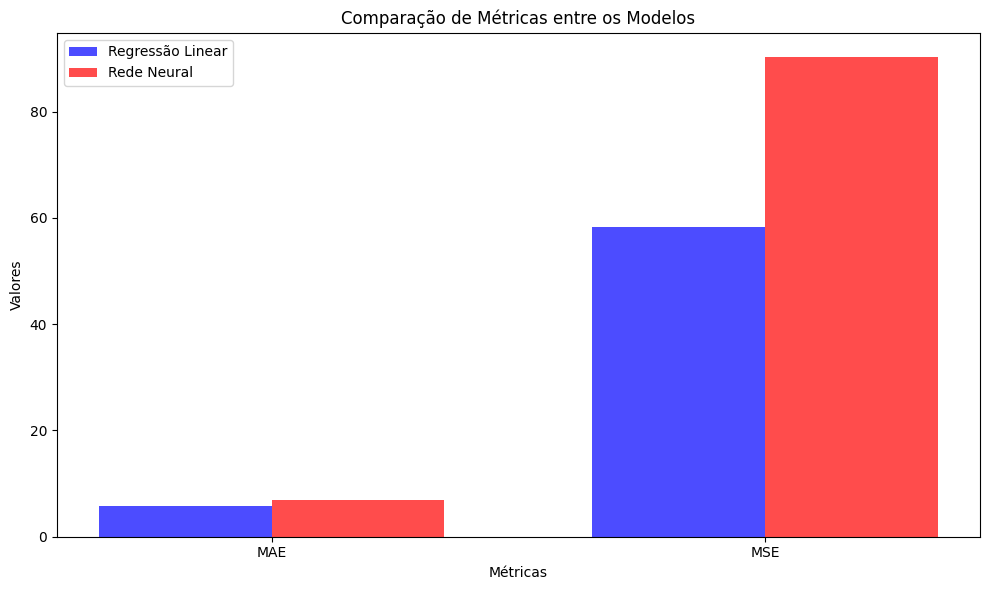

In [47]:
# gráfico comparativo do mae e mse do linear e neural
metrics = ['MAE', 'MSE']
linear_values = [mae_linear, mse_linear]
nn_values = [mae_nn, mse_nn]

x = np.arange(len(metrics))  # Posições no eixo x
width = 0.35  # Largura das barras

plt.figure(figsize=(10, 6))
plt.bar(x - width/2, linear_values, width, label='Regressão Linear', color='blue', alpha=0.7)
plt.bar(x + width/2, nn_values, width, label='Rede Neural', color='red', alpha=0.7)

plt.xlabel('Métricas')
plt.ylabel('Valores')
plt.title('Comparação de Métricas entre os Modelos')
plt.xticks(x, metrics)
plt.legend()

plt.tight_layout()
plt.show()
